### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import random

from montecarlo import create_sp_return_generator, create_housing_return_generator, last_entry

%matplotlib inline

### Test monte-carlo returns

In [2]:
sp_return = create_sp_return_generator()

In [3]:
housing_return = create_housing_return_generator()

In [4]:
housing_return()

0.026165751145269117

In [5]:
sp_return()

0.19824032769118677

### Create object that simulates the value and cost of owning a real-estate property through time

In [71]:
class REAsset:
    
    def __init__(self, initial_investment, rent_cost=1100, condo_fees=300, startup_cost=10_000, mortgate_fixed_rate=0.0289,
                property_tax_rate=0.02, school_tax_rate=0.0015, re_broker_fee=0.05, downpayment_rate=0.2, 
                amortization_period=20):
        
        self.mortgage_rate = mortgate_fixed_rate
        self.property_tax_rate = property_tax_rate
        self.school_tax_rate = school_tax_rate
        self.re_broker_fee = re_broker_fee
        self.value = initial_investment
        
        if initial_investment == 0:
            self.cost = 0
            self.rent_cost = rent_cost * 12
            self.condo_fees = 0
            self.mortgage_outstanding = 0
            self.mortgage_monthly_payment = 0
            self.principal_payment = 0
            self.interest_payment = 0
        else:
            self.cost = startup_cost
            self.rent_cost = 0
            self.condo_fees = condo_fees * 12
            self.mortgage_outstanding = (1 - downpayment_rate) * initial_investment
            self.r = self.mortgage_rate / 12
            self.n = amortization_period * 12
            self.mortgage_monthly_payment = self.mortgage_outstanding * \
                                            (self.r * (1 + self.r)**self.n)/ \
                                            (((1 + self.r)**self.n)-1)
            self.principal_payment = self.mortgage_outstanding / self.n
            self.interest_payment = self.mortgage_monthly_payment - self.principal_payment
            
        self.housing_return = create_housing_return_generator()
            
    def year_end_evaluation(self):
        
        self.value = self.value * (1 + self.housing_return())
        self.mortgage_outstanding -= self.principal_payment * 12
        
        taxes = self.value * (self.property_tax_rate + self.school_tax_rate)
        self.cost += 12 * self.interest_payment + self.condo_fees + self.rent_cost + taxes

### Simulate purchasing a condo costing 480,000 dollars over 20 years

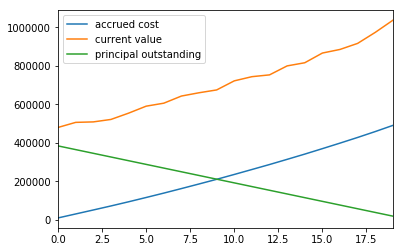

In [72]:
condo_cost = 480_000

test = REAsset(condo_cost)

data = []
for year in range(20):
    data.append({'current value': test.value, 'accrued cost': test.cost, 'principal outstanding': test.mortgage_outstanding})
    test.year_end_evaluation()
pd.DataFrame(data).plot()

### Simulate renting over 20 years

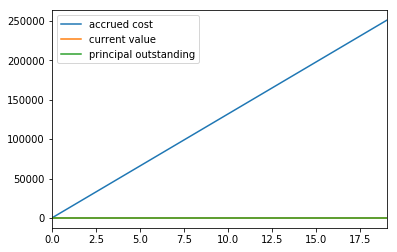

In [73]:
condo_cost = 0

test = REAsset(condo_cost)

data = []
for year in range(20):
    data.append({'current value': test.value, 'accrued cost': test.cost, 'principal outstanding': test.mortgage_outstanding})
    test.year_end_evaluation()
pd.DataFrame(data).plot()